In [1]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Getting weather data

In [77]:
weather = pd.read_csv('../Final_Data/London_weather_data_2011_2014.csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'Datetime', u'Dew_Point_F', u'Humidity',
       u'Temperature_F', u'Wind_Speed_MPH'],
      dtype='object')

In [78]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [79]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20378 entries, 2011-11-01 01:00:00 to 2014-02-28 23:00:00
Data columns (total 6 columns):
Unnamed: 0        20378 non-null object
Datetime          20378 non-null object
Dew_Point_F       20378 non-null float64
Humidity          20378 non-null float64
Temperature_F     20378 non-null float64
Wind_Speed_MPH    20144 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


In [80]:
weather = weather[weather.index > '2013-06-01 00:00:00']
weather = weather[weather.index < '2013-09-01 00:00:00']

weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2206 entries, 2013-06-01 01:00:00 to 2013-08-31 23:00:00
Data columns (total 6 columns):
Unnamed: 0        2206 non-null object
Datetime          2206 non-null object
Dew_Point_F       2206 non-null float64
Humidity          2206 non-null float64
Temperature_F     2206 non-null float64
Wind_Speed_MPH    2195 non-null float64
dtypes: float64(4), object(2)
memory usage: 120.6+ KB


In [141]:
weather.iloc[1000:1030]

,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH
2013-07-12 17:00:00,2013-07-12 17:00:00,53.6,44.0,77.0,3.5
2013-07-12 18:00:00,2013-07-12 18:00:00,55.4,47.0,77.0,4.6
2013-07-12 19:00:00,2013-07-12 19:00:00,55.4,50.0,75.2,4.6
2013-07-12 20:00:00,2013-07-12 20:00:00,55.4,53.0,73.4,3.5
2013-07-12 21:00:00,2013-07-12 21:00:00,55.0,45.0,72.0,3.5
2013-07-12 22:00:00,2013-07-12 22:00:00,57.2,68.0,68.0,3.5
2013-07-12 23:00:00,2013-07-12 23:00:00,57.2,68.0,68.0,3.5
2013-07-13 00:00:00,2013-07-13 00:00:00,57.2,77.0,64.4,3.5
2013-07-13 01:00:00,2013-07-13 01:00:00,59.0,88.0,62.6,3.5
2013-07-13 02:00:00,2013-07-13 02:00:00,57.2,88.0,60.8,3.5


## Getting energy data

In [87]:
energy = pd.read_csv('../Final_Data/energy_final_summer_2013.csv', parse_dates=[0], infer_datetime_format=True)
energy.iloc[:,1:].convert_objects(convert_numeric=True)
energy.columns

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [90]:
energy.drop([2207], axis=0, inplace=True)
energy.drop([0], axis=0, inplace=True)

energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 1 to 2206
Data columns (total 6 columns):
Unnamed: 0     2206 non-null object
DateTime       2206 non-null object
Adversity      2206 non-null float64
Affluent       2206 non-null float64
Comfortable    2206 non-null float64
Overall        2206 non-null float64
dtypes: float64(4), object(2)
memory usage: 120.6+ KB


In [91]:
energy.index = pd.DatetimeIndex(energy.DateTime)

energy.tail()

,Unnamed: 0,DateTime,Adversity,Affluent,Comfortable,Overall
2013-08-31 18:00:00,2202,2013-08-31 18:00:00,0.374944,0.459233,0.426691,0.422503
2013-08-31 19:00:00,2203,2013-08-31 19:00:00,0.380413,0.498233,0.436867,0.442483
2013-08-31 20:00:00,2204,2013-08-31 20:00:00,0.415748,0.526860,0.483190,0.478227
2013-08-31 21:00:00,2205,2013-08-31 21:00:00,0.393023,0.502103,0.471448,0.457751
2013-08-31 22:00:00,2206,2013-08-31 22:00:00,0.350717,0.447292,0.422130,0.408573


In [92]:
energy.drop('Unnamed: 0', axis=1, inplace=True)
energy.head()

,DateTime,Adversity,Affluent,Comfortable,Overall
2013-06-01 01:00:00,2013-06-01 01:00:00,0.230842,0.278700,0.244765,0.253613
2013-06-01 02:00:00,2013-06-01 02:00:00,0.189835,0.245440,0.205539,0.216167
2013-06-01 03:00:00,2013-06-01 03:00:00,0.174445,0.227109,0.193453,0.200526
2013-06-01 04:00:00,2013-06-01 04:00:00,0.168976,0.220245,0.191286,0.195418
2013-06-01 05:00:00,2013-06-01 05:00:00,0.177313,0.236940,0.197315,0.206423


In [93]:
len(energy)

2206

## Plot energy data by income

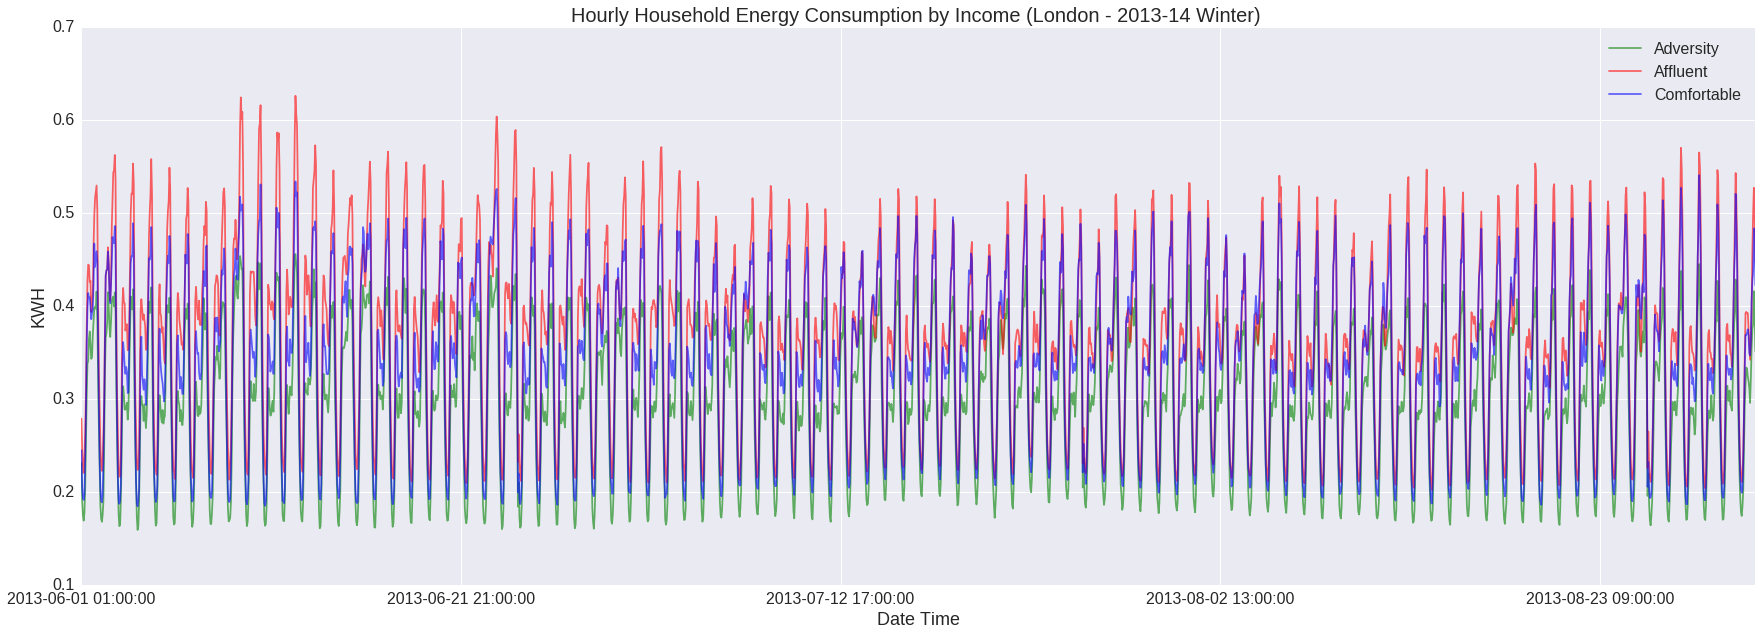

In [94]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy.plot(x='DateTime', y='Adversity', color='Green',alpha=.6, ax=ax)
energy.plot(x='DateTime', y='Affluent', color='Red', alpha=.6, ax=ax)
energy.plot(x='DateTime', y='Comfortable', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.xticks(fontsize=16)
pl.yticks(fontsize=16)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
pl.legend(fontsize=16)
pl.show()

## Merge and plot energy and weather data

In [95]:
#weather = weather.convert_objects(convert_numeric=True)

weather.drop('Unnamed: 0', 1, inplace=True)
weather.head()

,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH
2013-06-01 01:00:00,2013-06-01 01:00:00,48.2,77.0,55.4,9.2
2013-06-01 02:00:00,2013-06-01 02:00:00,44.6,72.0,53.6,6.9
2013-06-01 03:00:00,2013-06-01 03:00:00,42.8,71.0,51.8,6.9
2013-06-01 04:00:00,2013-06-01 04:00:00,41.0,71.0,50.0,8.1
2013-06-01 05:00:00,2013-06-01 05:00:00,41.0,71.0,50.0,6.9


In [96]:
energy.reset_index(inplace=True)
energy.head()

,index,DateTime,Adversity,Affluent,Comfortable,Overall
0,2013-06-01 01:00:00,2013-06-01 01:00:00,0.230842,0.278700,0.244765,0.253613
1,2013-06-01 02:00:00,2013-06-01 02:00:00,0.189835,0.245440,0.205539,0.216167
2,2013-06-01 03:00:00,2013-06-01 03:00:00,0.174445,0.227109,0.193453,0.200526
3,2013-06-01 04:00:00,2013-06-01 04:00:00,0.168976,0.220245,0.191286,0.195418
4,2013-06-01 05:00:00,2013-06-01 05:00:00,0.177313,0.236940,0.197315,0.206423


In [97]:
weather1.reset_index(inplace=True)
weather1.head()

,level_0,index,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH
0,0,2013-06-01 00:00:00,2013-06-01 00:00:00,48.2,72.0,57.2,10.4
1,1,2013-06-01 01:00:00,2013-06-01 01:00:00,48.2,77.0,55.4,9.2
2,2,2013-06-01 02:00:00,2013-06-01 02:00:00,44.6,72.0,53.6,6.9
3,3,2013-06-01 03:00:00,2013-06-01 03:00:00,42.8,71.0,51.8,6.9
4,4,2013-06-01 04:00:00,2013-06-01 04:00:00,41.0,71.0,50.0,8.1


In [98]:
final_summer2013 = pd.merge(weather1, energy, on='index')

In [99]:
final_summer2013.columns

Index([u'level_0', u'index', u'Datetime', u'Dew_Point_F', u'Humidity',
       u'Temperature_F', u'Wind_Speed_MPH', u'DateTime', u'Adversity',
       u'Affluent', u'Comfortable', u'Overall'],
      dtype='object')

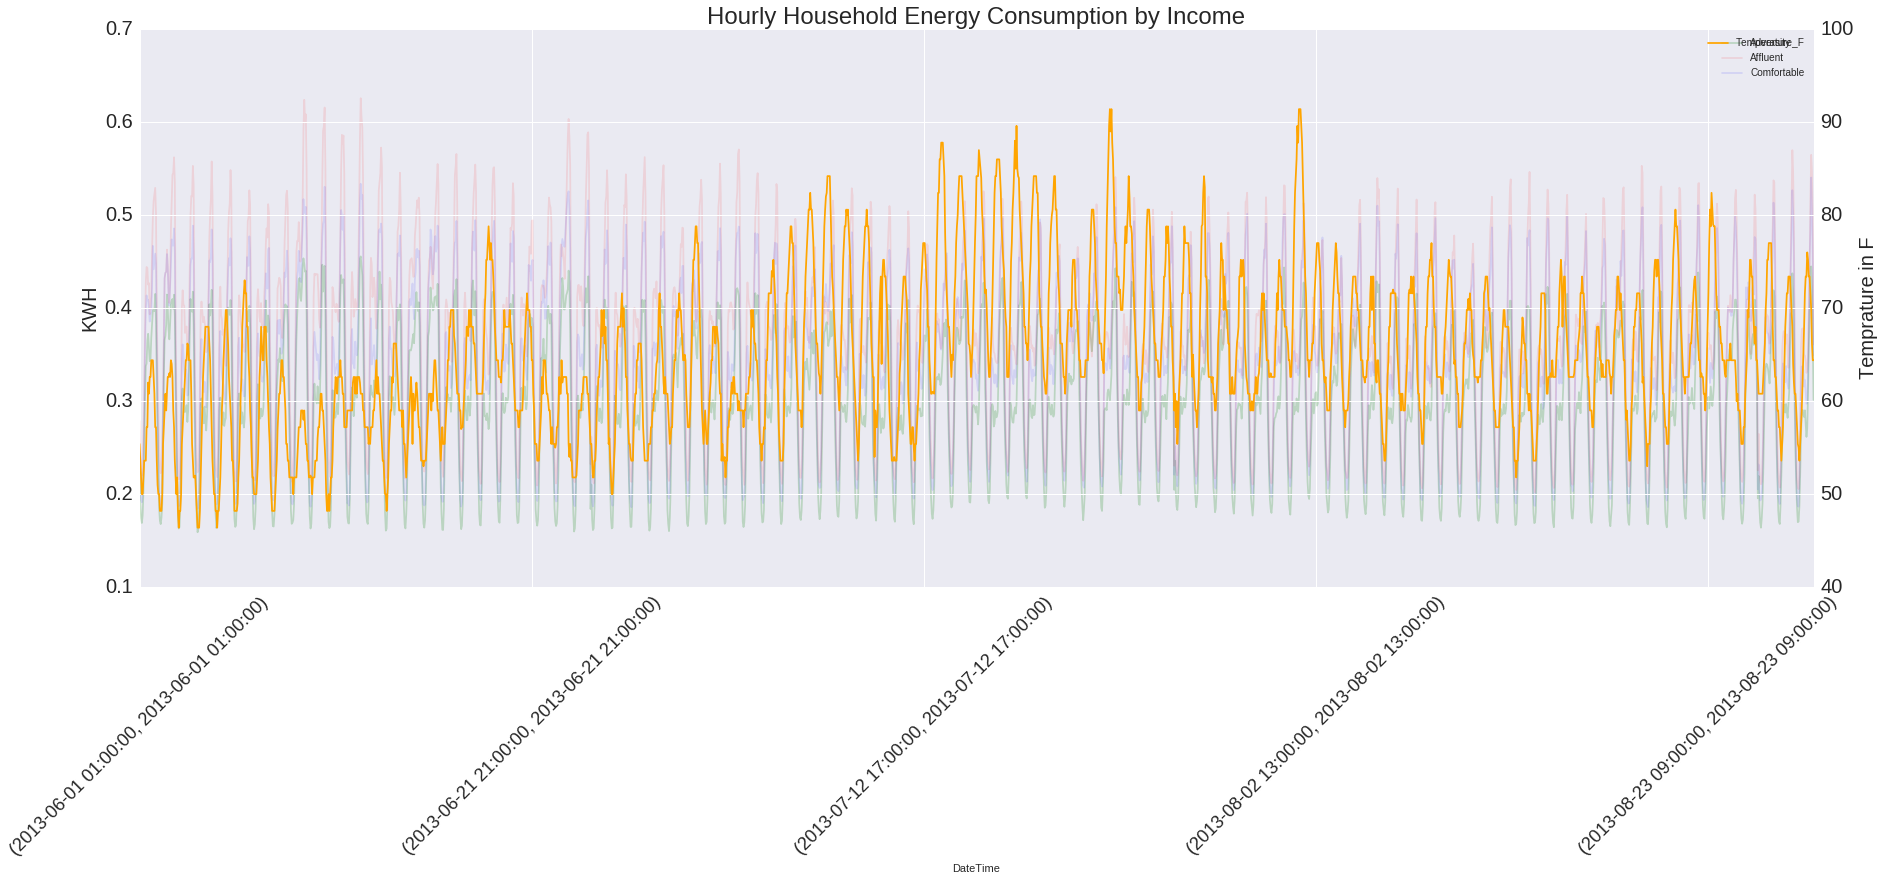

In [136]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()

final_summer2013.plot(x='DateTime', y='Adversity', color='Green', alpha=.2, ax=ax1)
final_summer2013.plot(x='DateTime', y='Affluent', color='Red', alpha=.1, ax=ax1)
final_summer2013.plot(x='DateTime', y='Comfortable', color='Blue',alpha=.1, ax=ax1)
final_summer2013.plot(x='DateTime', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)

pl.setp(ax1.get_yticklabels(), fontsize=20)
pl.setp(ax2.get_yticklabels(), fontsize=20)
pl.setp(ax1.get_xticklabels(), rotation=45, fontsize=18)

ax1.set_ylabel("KWH", fontsize=20)
ax2.set_ylabel("Temprature in F", fontsize=20)

pl.xlabel("Date Time", fontsize=40)
pl.title('Hourly Household Energy Consumption by Income', fontsize=24)

pl.show()

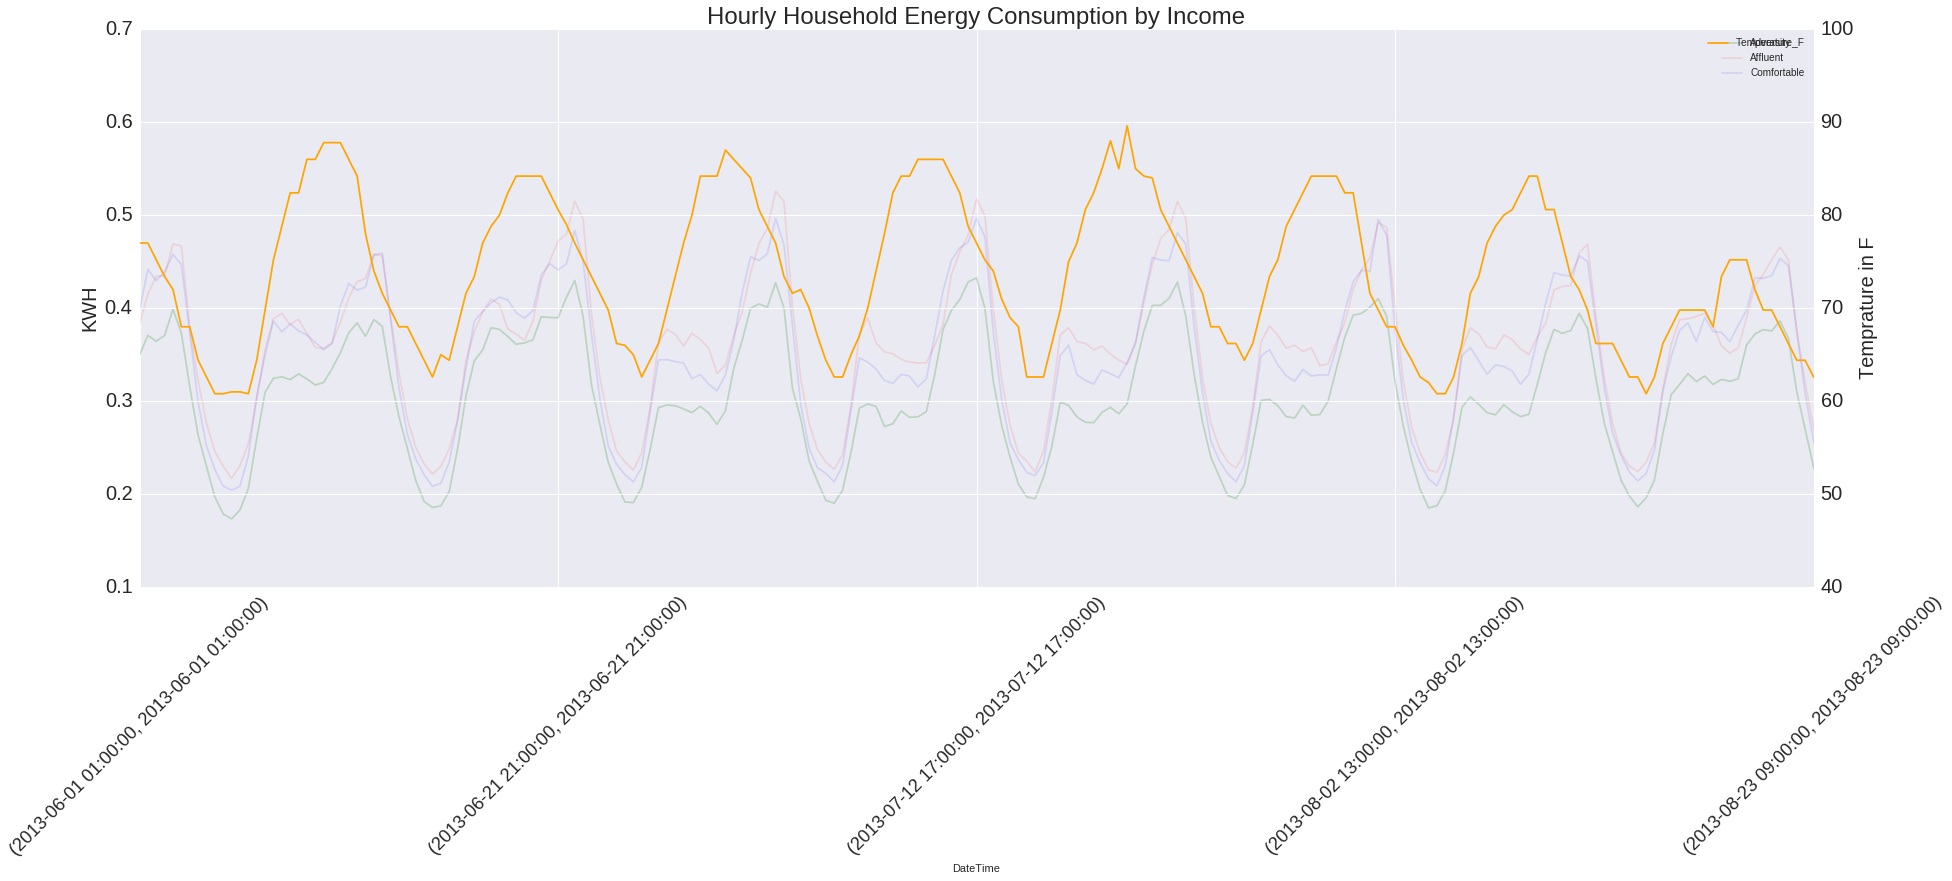

In [138]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()

final_summer2013.plot(x='DateTime', y='Adversity', color='Green', alpha=.2, ax=ax1)
final_summer2013.plot(x='DateTime', y='Affluent', color='Red', alpha=.1, ax=ax1)
final_summer2013.plot(x='DateTime', y='Comfortable', color='Blue',alpha=.1, ax=ax1)
final_summer2013.plot(x='DateTime', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)

pl.setp(ax1.get_yticklabels(), fontsize=20)
pl.setp(ax2.get_yticklabels(), fontsize=20)
pl.setp(ax1.get_xticklabels(), rotation=45, fontsize=18)

ax1.set_ylabel("KWH", fontsize=20)
ax2.set_ylabel("Temprature in F", fontsize=20)

pl.xlabel("Date Time", fontsize=40)
pl.title('Hourly Household Energy Consumption by Income', fontsize=24)

pl.xlim(1000,1200)
pl.show()


## Regress directly Energy x Temperature

In [101]:
#OLS of Adversity ~ Temperature_F
regress1 = smf.ols(formula = 'Adversity ~ Temperature_F', data = final_summer2013).fit()
print ('pvalue for temperature vs low income is ', regress1.pvalues[1])
regress1.summary()

pvalue for temperature vs low income is  6.53639610841e-98


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adversity   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     490.0
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           6.54e-98
Time:                        20:05:46   Log-Likelihood:                 2697.7
No. Observations:                2135   AIC:                            -5391.
Df Residuals:                    2133   BIC:                            -5380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.0409      0.012      3.483      0.001         0.018     0.064
Temperature_F     0.0040      0.000     22.137      0.000         0.004     0.004
==============================================================================
Omnibus:                      161.829   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.553
Skew:                           0.346   Prob(JB):                     5.90e-20
Kurtosis:                       2.281   Cond. No.                         520.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since regression does not show any correlation, look for alternatives. 
The main reason of energy consumption variability is the daily cycle of energy use. If we offset the daily pattern we can see more clearly how weather (namely Temperature) plays a role on energy consumption.

## Applying seasonal decomposition before regressing

### Affluent

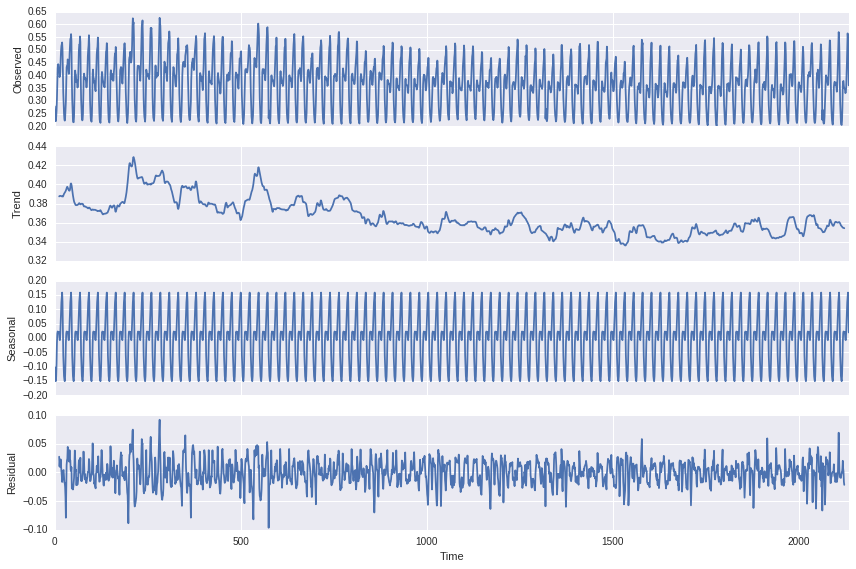

In [103]:
##Seasonal Decomposition of high income energy consumption
data = np.array(final_summer2013.Affluent)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(data, freq = 24)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()

In [104]:
# renaming "index" column so that it can be accessed
final_summer2013.rename(columns ={'index':'DateTime'}, inplace=True)



In [105]:
#Adding the residuals of the seasonal deccomposition to the dataframe
final_summer2013['HI_residuals'] = res.observed - res.seasonal
final_summer2013.head()

,level_0,DateTime,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH,DateTime,Adversity,Affluent,Comfortable,Overall,HI_residuals
0,1,2013-06-01 01:00:00,2013-06-01 01:00:00,48.2,77.0,55.4,9.2,2013-06-01 01:00:00,0.230842,0.278700,0.244765,0.253613,0.380405
1,2,2013-06-01 02:00:00,2013-06-01 02:00:00,44.6,72.0,53.6,6.9,2013-06-01 02:00:00,0.189835,0.245440,0.205539,0.216167,0.378238
2,3,2013-06-01 03:00:00,2013-06-01 03:00:00,42.8,71.0,51.8,6.9,2013-06-01 03:00:00,0.174445,0.227109,0.193453,0.200526,0.371717
3,4,2013-06-01 04:00:00,2013-06-01 04:00:00,41.0,71.0,50.0,8.1,2013-06-01 04:00:00,0.168976,0.220245,0.191286,0.195418,0.370929
4,5,2013-06-01 05:00:00,2013-06-01 05:00:00,41.0,71.0,50.0,6.9,2013-06-01 05:00:00,0.177313,0.236940,0.197315,0.206423,0.370748


In [106]:
#OLS HI_trend ~ Temperature_F
regress2 = smf.ols(formula = 'HI_residuals ~ Temperature_F', data = final_summer2013).fit()
print ('pvalue for temperature vs low income is ', regress2.pvalues[1])
regress2.summary()

pvalue for temperature vs low income is  2.23210400745e-60


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HI_residuals   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     286.4
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           2.23e-60
Time:                        20:06:18   Log-Likelihood:                 4735.1
No. Observations:                2135   AIC:                            -9466.
Df Residuals:                    2133   BIC:                            -9455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.4421      0.005     97.721      0.000         0.433     0.451
Temperature_F    -0.0012   6.91e-05    -16.923      0.000        -0.001    -0.001
==============================================================================
Omnibus:                      201.640   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.734
Skew:                           0.604   Prob(JB):                     3.92e-90
Kurtosis:                       4.780   Cond. No.                         520.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

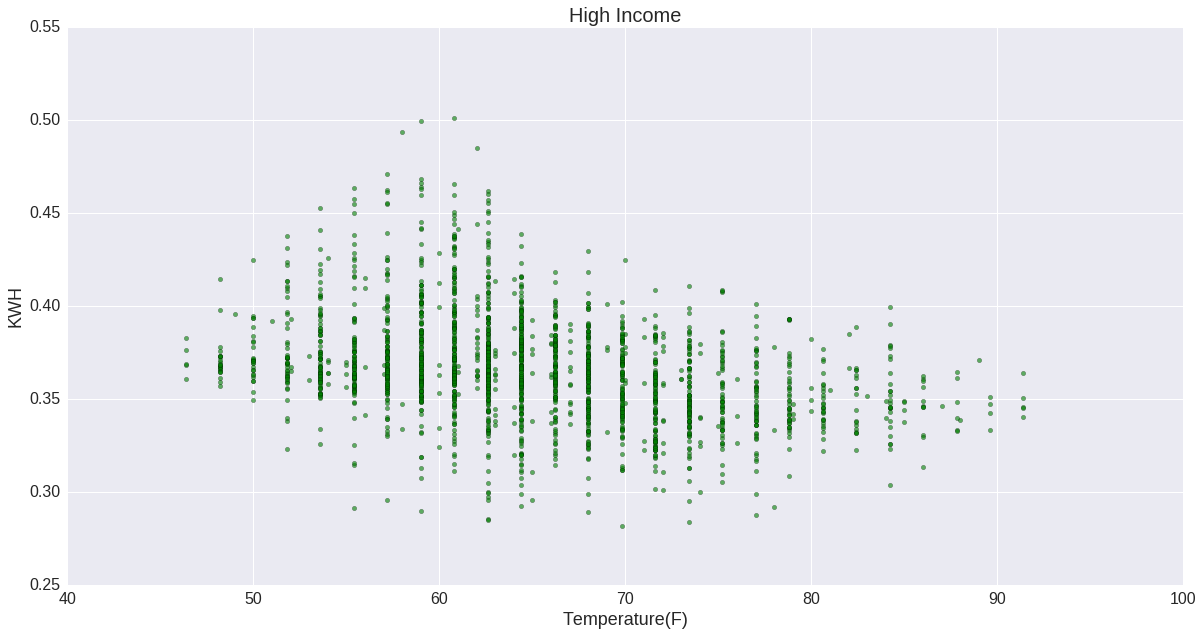

In [142]:
#plotting HI_residuasls and Temperature_F
ax = pl.figure(figsize=(20,10)).add_subplot(111)
final_summer2013.plot(x='Temperature_F', y='HI_residuals', kind='scatter', color="green", alpha=.6, ax=ax)
pl.xticks(fontsize=16)
pl.yticks(fontsize=16)
pl.title('High Income', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Temperature(F)", fontsize=18)
pl.show()


## Testing different lags for weather and energy consumption data

In [147]:
def plot_lag(hh, income):
    '''
    Plots the correlation of the Eergy consumption data with the lagged temperature data
    
    hh: hour of the day as a reference for the lag
    income: income level
    '''
    
    # time series decomposition
    data = np.array(final_summer2013[income])
    decomposed = sm.tsa.seasonal_decompose(data, freq = 24)
    
    final_summer2013[income + '_res'] = decomposed.observed - decomposed.seasonal
    
    
    fig = pl.figure(figsize=(20,20))

    for i in range(24):

        pl.subplot(6,4,i+1)

        # adjusting the sizes of the arrays 
        if i <= 35-hh:
            res_init = hh-1
        else:
            res_init = hh-1 + 24

        #debugging
        #print ("i = {0}".format(i))
        #print ("xdim = {0}, ydim = {1}".format(final_summer2013.Temperature_F[(hh-1)+(i-12)::24].shape, final_summer2013.HI_residuals[res_init::24].shape))

        #OLS
        x = np.array(final_summer2013.Temperature_F[(hh-1)+(i-12)::24])
        y = np.array(final_summer2013[income + '_res'][res_init::24])
        lm = sm.OLS(y, sm.add_constant(x)).fit()
        ypredict = lm.predict(sm.add_constant(x))

        #plot
        pl.plot(x, y,'.')
        pl.plot(x, ypredict, 'r')
        pl.xticks(fontsize=12)
        pl.yticks(fontsize=12)
        pl.title("lag = {0}, R2 = {1}".format(i-12, lm.rsquared), fontsize=16)
        pl.ylabel("KWH", fontsize=14)
        pl.xlabel("Temperature (F)", fontsize=14)

    pl.tight_layout()
    pl.show()
    
    return 0

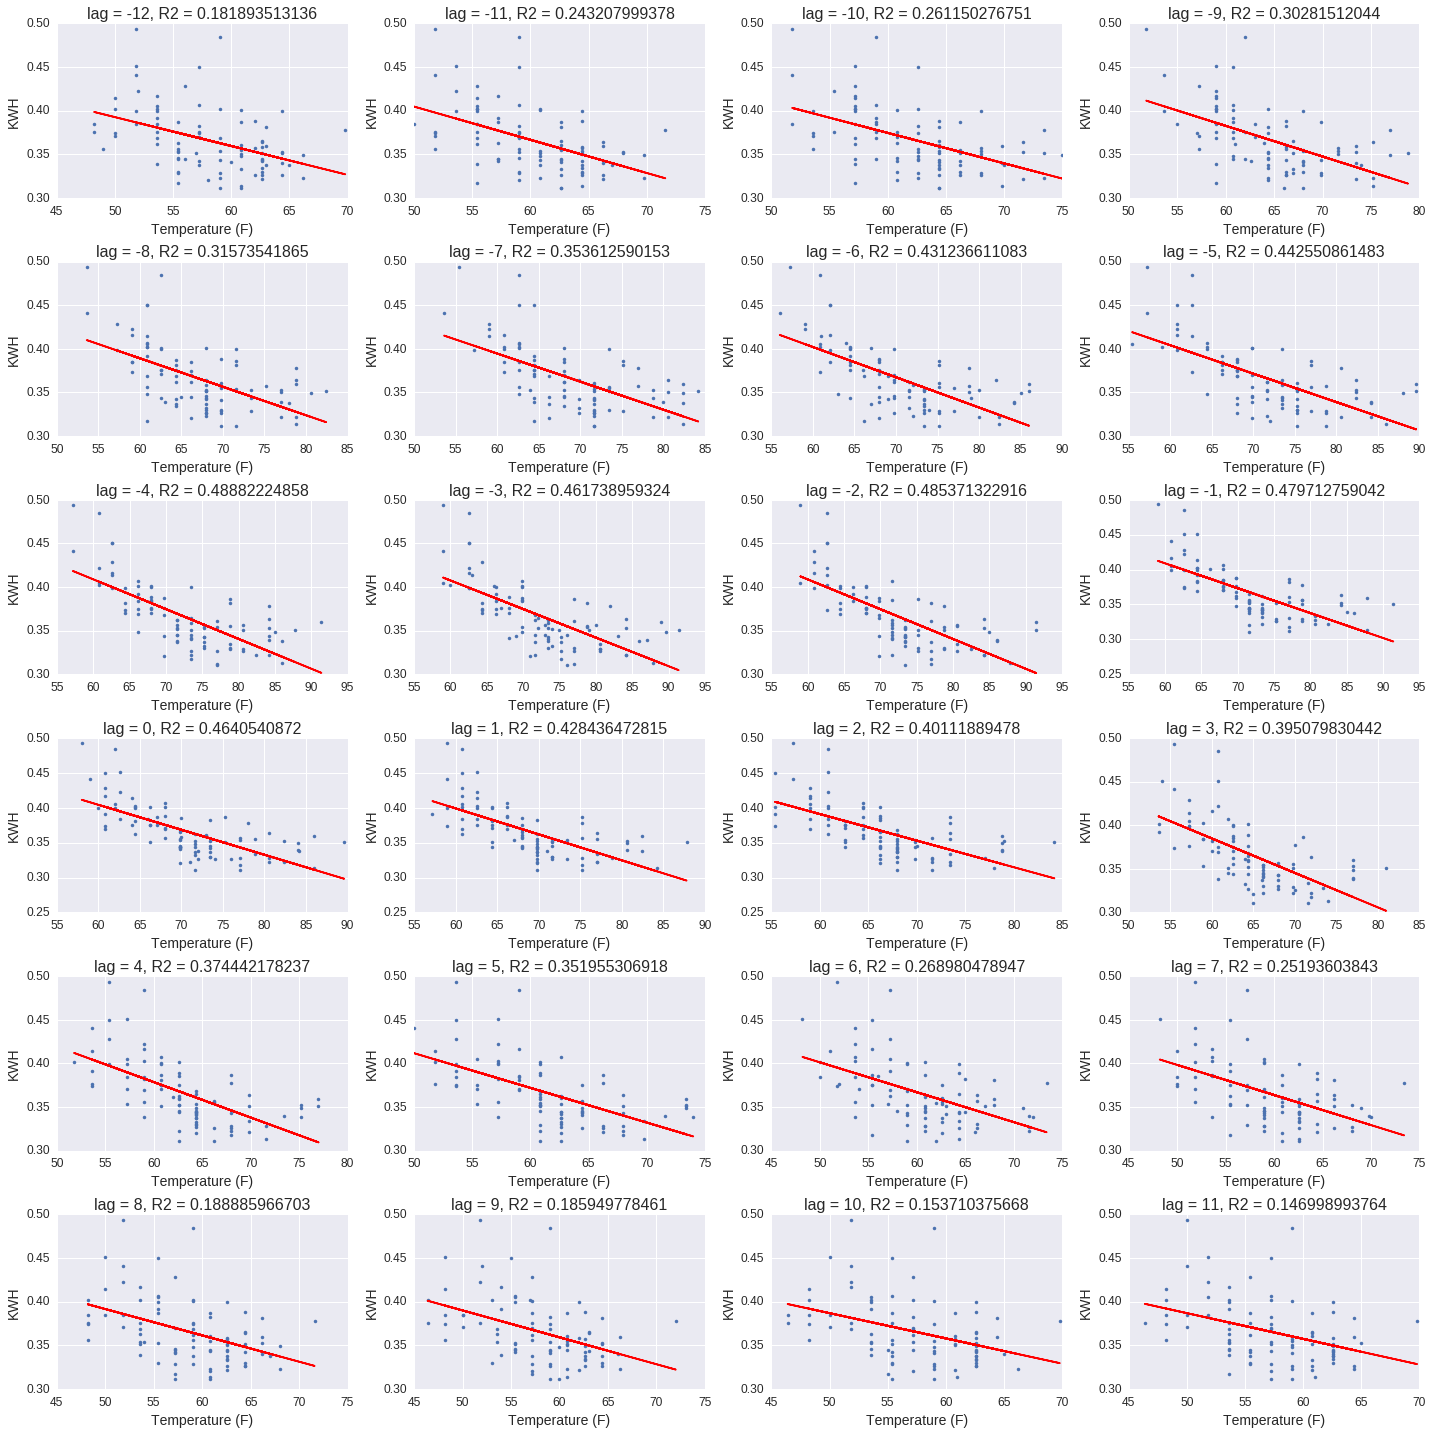

0

In [149]:
# hh = 18 , Affluent
plot_lag(18, 'Affluent')

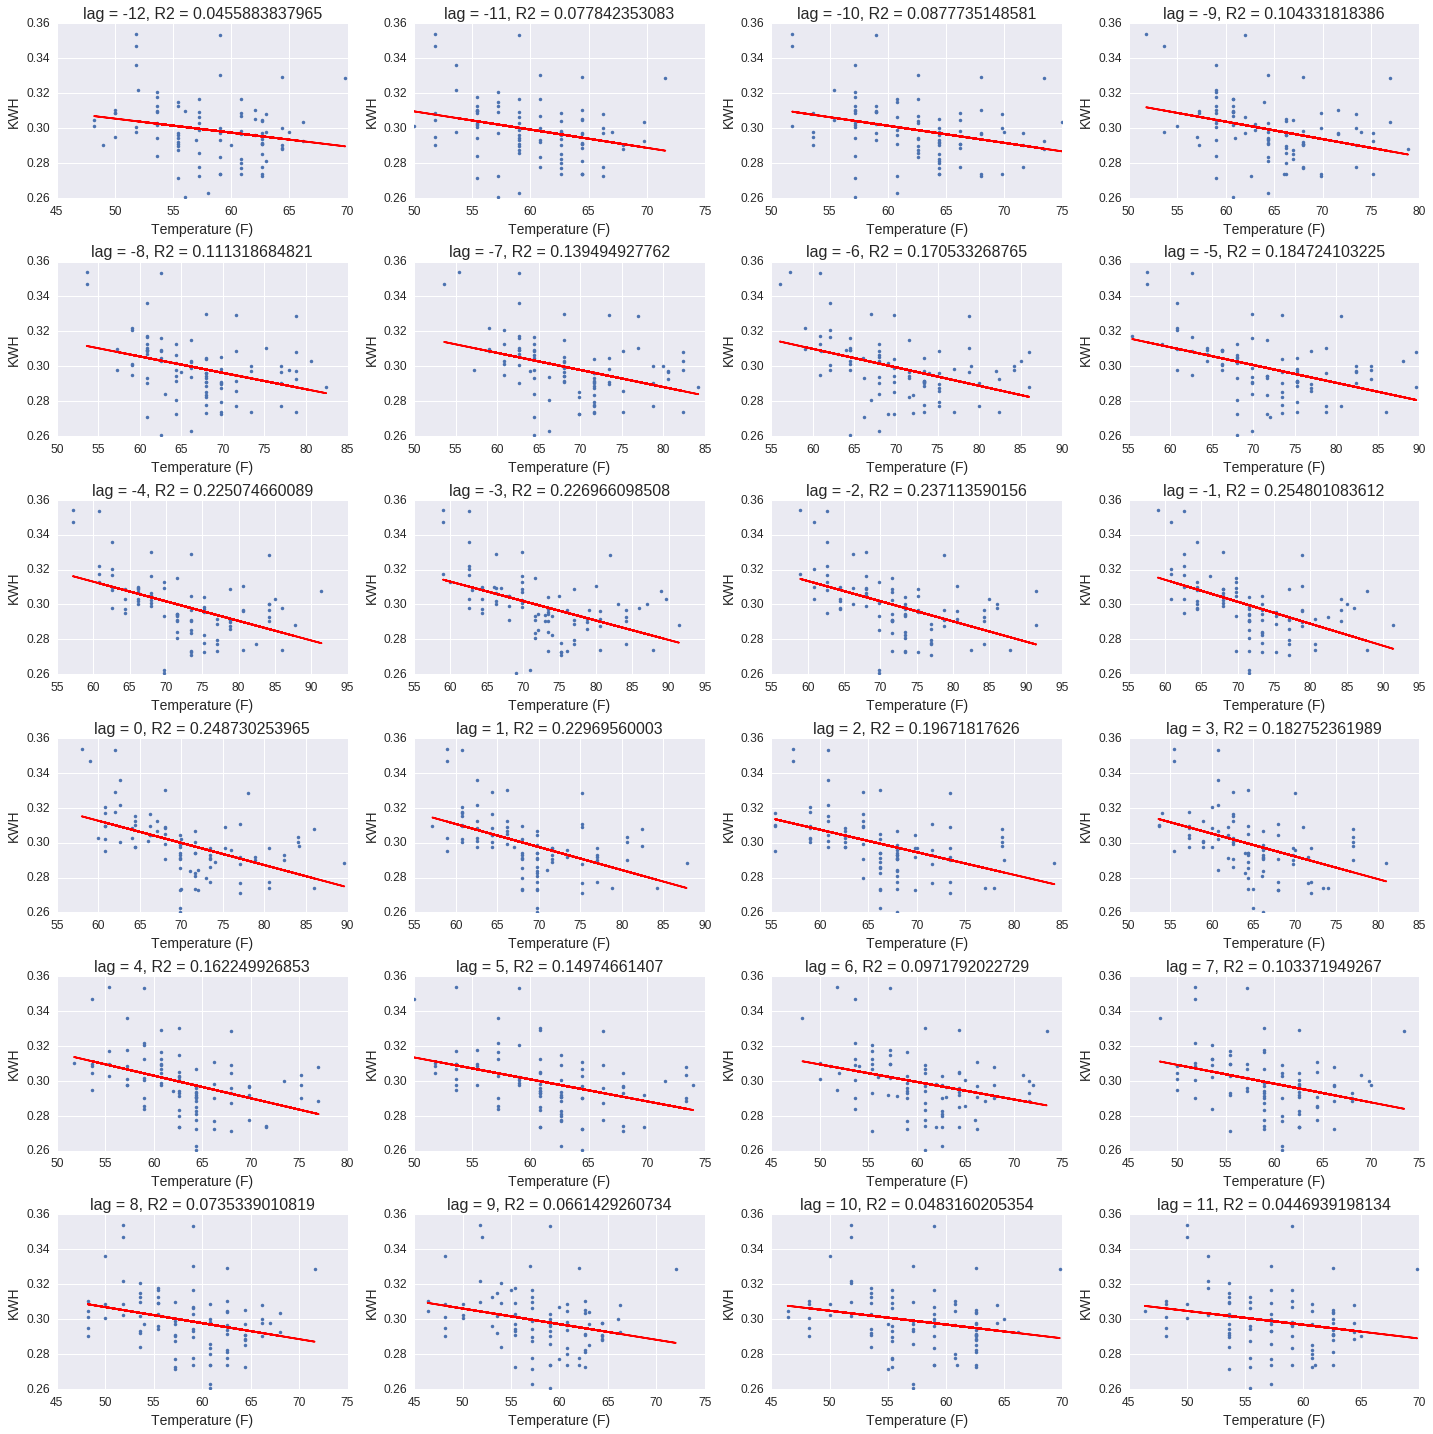

0

In [150]:
# hh = 18 , Affluent
plot_lag(18, 'Adversity')

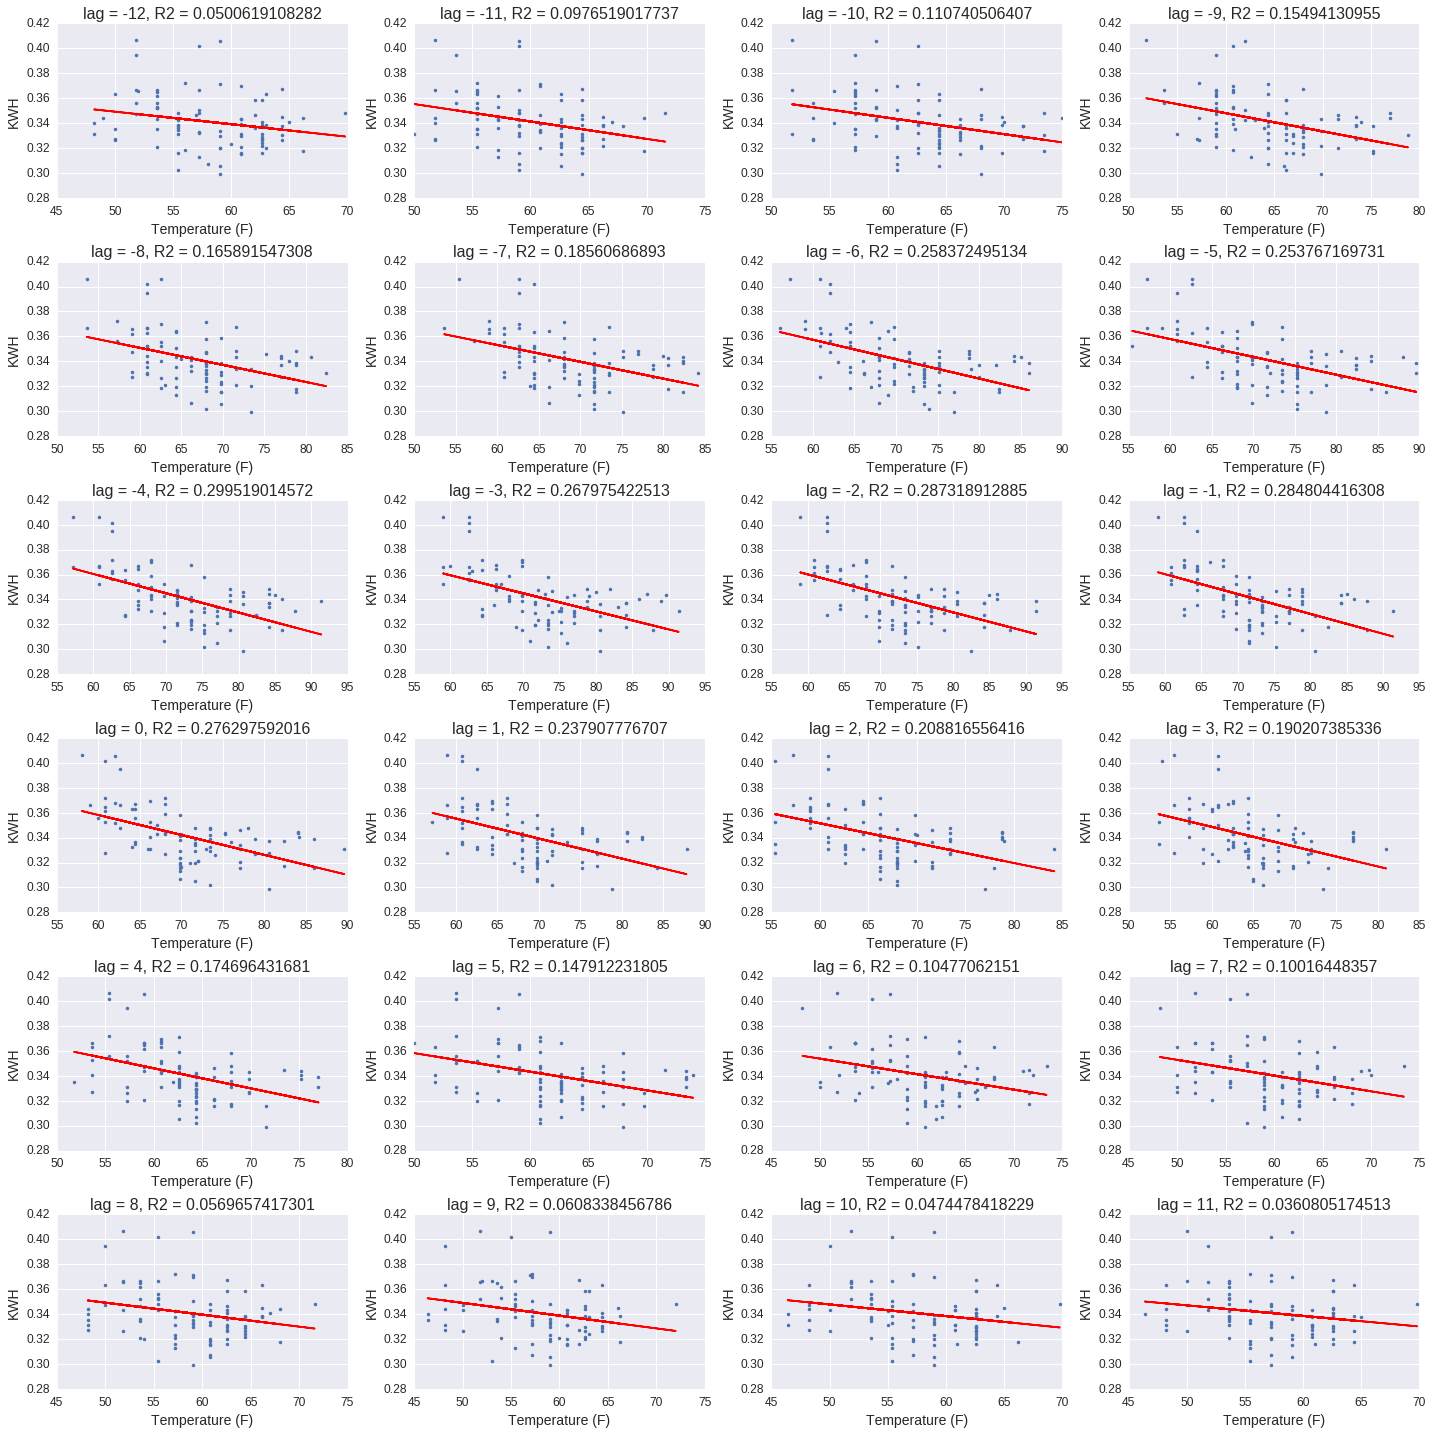

0

In [151]:
# hh = 18 , Affluent
plot_lag(18, 'Comfortable')

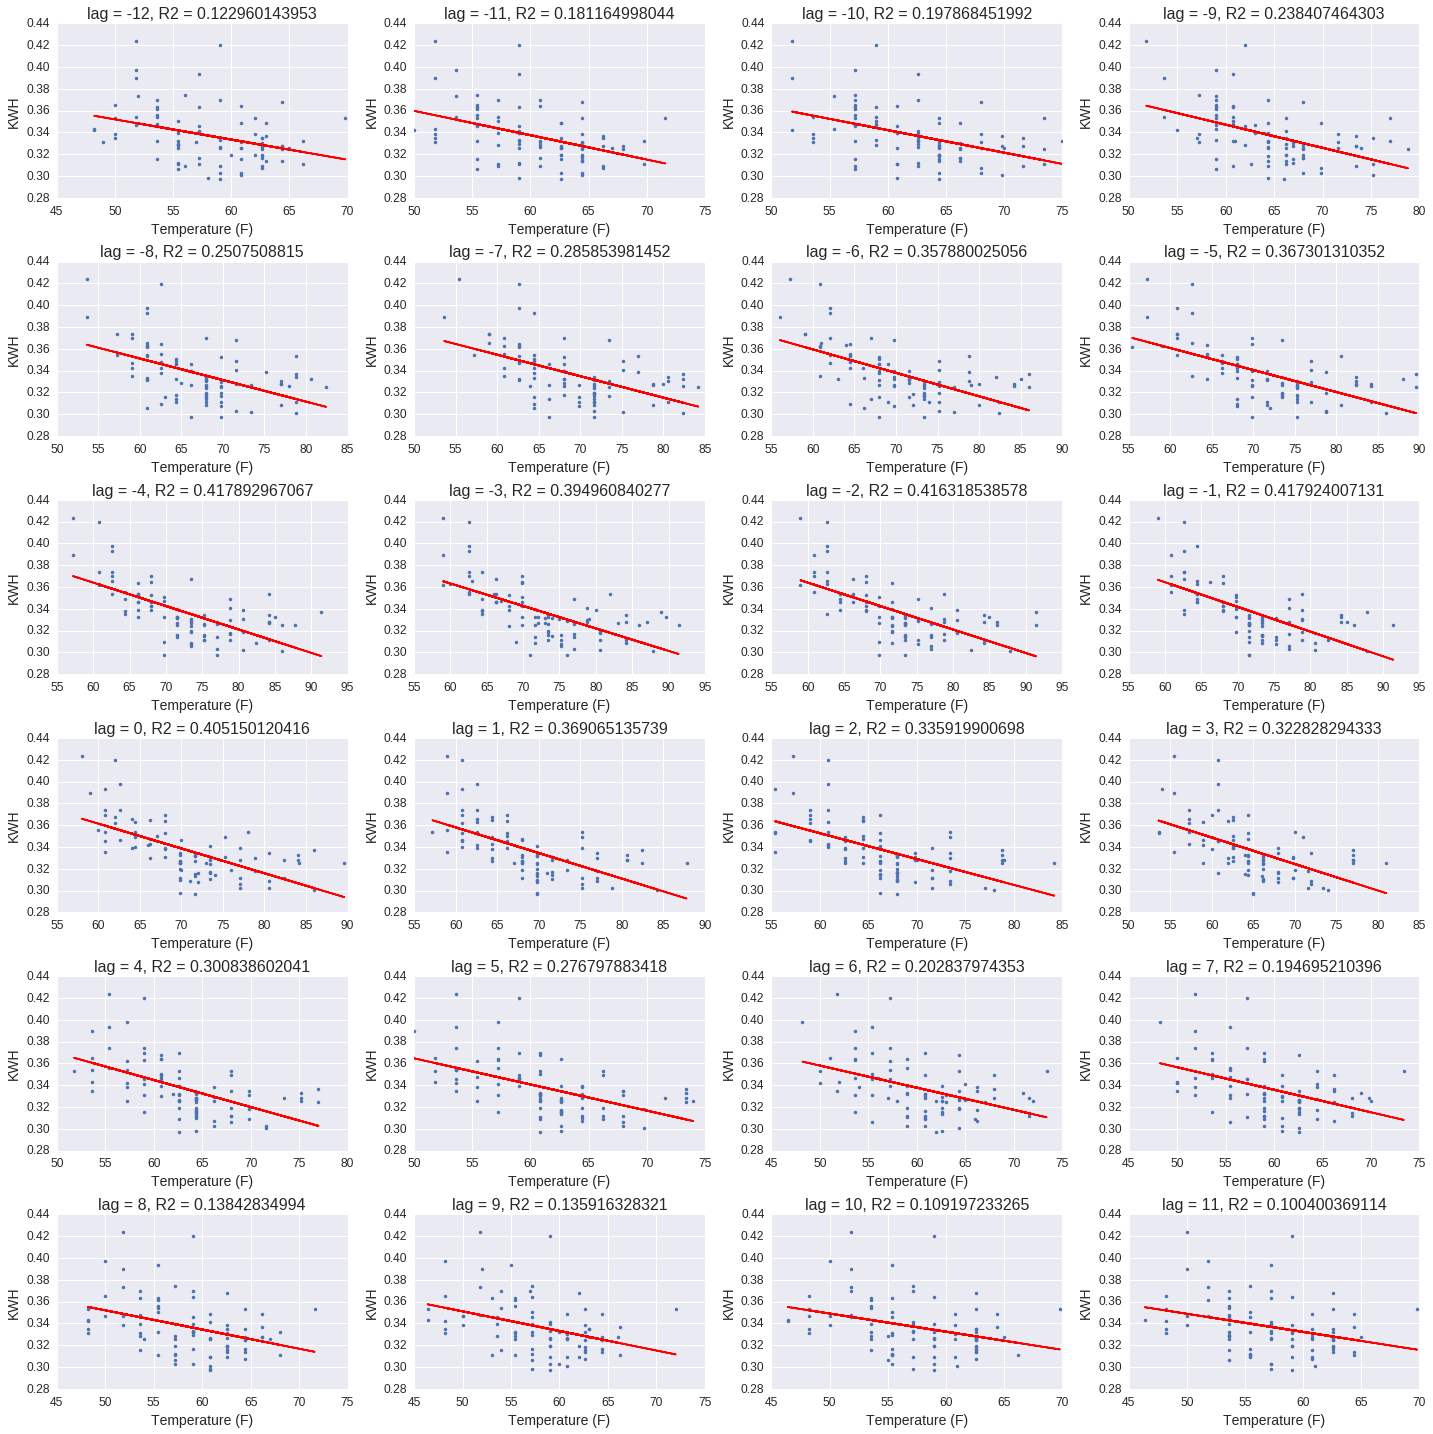

0

In [152]:
# hh = 18 , Affluent
plot_lag(18, 'Overall')